In [9]:
# Import các thư viện
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, confusion_matrix,f1_score,roc_auc_score

In [10]:
# Đọc dữ liệu từ file CSV chứa các nhãn thực tế và dự đoán
response_df = pd.read_csv('../Data/catalogue.csv')

In [11]:
# Loại bỏ khoảng trắng trong các nhãn 'Sentiment' và 'Predicted_sentiment'
response_df['Sentiment'] = response_df['Sentiment'].str.replace(" ","")
response_df['Predicted_sentiment'] = response_df['Predicted_sentiment'].str.replace(" ","")

In [12]:
# Chuyển các nhãn thực tế và dự đoán thành danh sách
y_test = response_df['Sentiment'].tolist()  # Nhãn thực tế
y_pred = response_df['Predicted_sentiment'].tolist()  # Nhãn dự đoán

In [13]:
# Tính toán ma trận nhầm lẫn (Confusion Matrix)
cnf_matrix = confusion_matrix(y_test, y_pred)  # Tạo ma trận nhầm lẫn từ nhãn thực tế và dự đoán
cnf_matrix  # In ma trận nhầm lẫn ra màn hình

array([[8, 2, 0],
       [0, 0, 0],
       [0, 0, 2]], dtype=int64)

In [14]:
# Định nghĩa hàm vẽ ma trận nhầm lẫn
def plot_confusion_matrix(cm, classes):
    tick_marks = np.arange(len(classes))  # Tạo các chỉ mục cho các lớp

    # Vẽ các giá trị vào ma trận nhầm lẫn
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j]), horizontalalignment="center",
                 color="white" if cm[i, j] > (cm.max() / 2.0) else "black")  # Tô màu chữ tùy theo giá trị

    # Vẽ ma trận nhầm lẫn dưới dạng biểu đồ màu
    plt.imshow(cm, cmap = plt.cm.YlGnBu)  # Dùng màu YlGnBu cho ma trận
    plt.colorbar()  # Hiển thị thanh màu
    plt.title('Confusion matrix')  # Tiêu đề biểu đồ
    plt.ylabel('True label')  # Nhãn trục y (Nhãn thực tế)
    plt.xlabel('Predicted label')  # Nhãn trục x (Nhãn dự đoán)
    plt.xticks(tick_marks, classes)  # Đặt nhãn trục x
    plt.yticks(tick_marks, classes)  # Đặt nhãn trục y
    plt.tight_layout()  # Điều chỉnh để không bị cắt xén


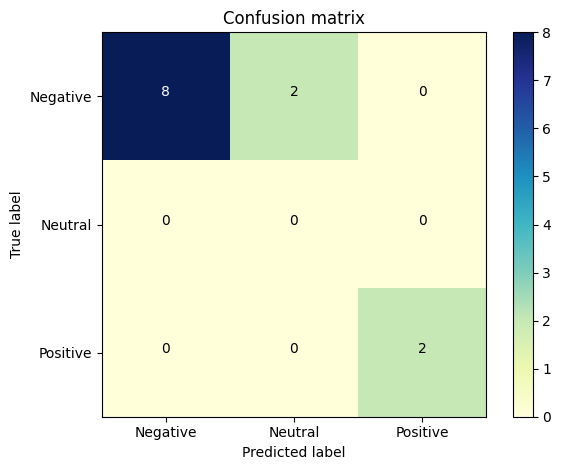

In [15]:
# Gọi hàm vẽ ma trận nhầm lẫn
plot_confusion_matrix(cnf_matrix, classes=['Negative', 'Neutral', 'Positive'])

In [16]:
# In ra các chỉ số đánh giá mô hình
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))
print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))


Accuracy: 0.83

Weighted Precision: 1.00
Weighted Recall: 0.83
Weighted F1-score: 0.91


e:\2024_2025_HK1\TLCN\telekafka\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
